# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

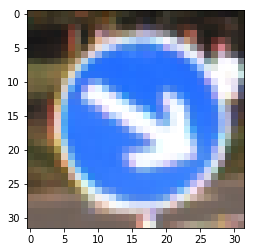

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index]
plt.figure()
plt.imshow(image)
# y_train[index]

In [4]:
signnames = pd.read_csv("signnames.csv").values[:,1]
signnames

array(['Speed limit (20km/h)', 'Speed limit (30km/h)',
       'Speed limit (50km/h)', 'Speed limit (60km/h)',
       'Speed limit (70km/h)', 'Speed limit (80km/h)',
       'End of speed limit (80km/h)', 'Speed limit (100km/h)',
       'Speed limit (120km/h)', 'No passing',
       'No passing for vehicles over 3.5 metric tons',
       'Right-of-way at the next intersection', 'Priority road', 'Yield',
       'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited',
       'No entry', 'General caution', 'Dangerous curve to the left',
       'Dangerous curve to the right', 'Double curve', 'Bumpy road',
       'Slippery road', 'Road narrows on the right', 'Road work',
       'Traffic signals', 'Pedestrians', 'Children crossing',
       'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing',
       'End of all speed and passing limits', 'Turn right ahead',
       'Turn left ahead', 'Ahead only', 'Go straight or right',
       'Go straight or left', 'Keep right', 'Keep le

In [5]:
n_classes = len(set(y_train))
sign_classes, class_counts = np.unique(y_train, return_counts = True)

<Container object of 43 artists>

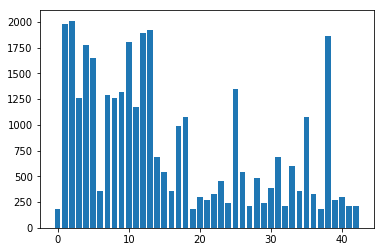

In [6]:
plt.bar(range(n_classes), class_counts)
# class_counts.shape[0]

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
X_train[0].shape

(32, 32, 3)

In [8]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
import cv2
def convert_gray(x):
    x_gray = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)
    # x_gray = x[:,:,:,0] * 299/1000 + x[:,:,:,1] * 587/1000 + x[:,:,:,2] * 114/1000 
    x_final = (x_gray/255.).astype(np.float32)
    
    return x_final.reshape(32,32,1)

### converting to grayscale, etc.
def to_array(x):
    x_list = [convert_gray(y) for y in x]
    x_array = np.array(x_list)
    return x_array

In [9]:
X_train = to_array(X_train)

In [10]:
X_valid = to_array(X_valid)
X_test = to_array(X_test)

### Model Architecture

In [11]:
################ Architecture: ###################################
#  LeNet architecture: Two convolutional layers followed by one flatten layer and three
#   fully connected linear layers.
###
#  convolution 1: 32x32x1  -> 28x28x12 -> relu -> 14x14x12 (pooling)
#  convolution 2: 14x14x12 -> 10x10x25 -> relu -> 5x5x25   (pooling)
#         flatten: 5x5x25   -> 625
#        drop out: 625      -> 625
#         linear: 625      -> 300
#         linear: 300      -> 150
#         linear: 150      -> 43


In [12]:
### Define your architecture here.
import tensorflow as tf
mu = 0
sigma = 0.1 # (as per course)
def conv2d(input, in_len, in_depth, out_len, out_depth):
    """
    Arguments:
    input: input image
    in_len = both height and wodth are same
    in_depth = depth (in channels)
    out_len = output dimension
    out_depth = output no. of channels
    """
    k_len = in_len - out_len + 1
    conv_w = tf.Variable(tf.truncated_normal(shape=[k_len, k_len, in_depth, out_depth], mean = mu, stddev = sigma))
    conv_b = tf.Variable(tf.zeros(out_depth))
    
    conv = tf.nn.conv2d(input, conv_w, strides = [1,1,1,1], padding ="VALID") + conv_b
    return conv
def activation(conv):
    return tf.nn.relu(conv)

def linear_layer(input, shape_in, shape_out):
    w = tf.Variable(tf.truncated_normal(shape=[shape_in, shape_out], mean = mu, stddev = sigma))
    b = tf.Variable(tf.zeros(shape_out)) 
    linear = tf.matmul(input, w) + b
    return linear
def classifier(input, keep_prob):
    # layer 1 conv layer 32x32x1  -> 28x28x12 -> relu -> 14x14x12 (pooling)
    conv2d_1 = conv2d(input,32, 1, 28, 12)
    conv2d_1 = activation(conv2d_1)
    conv2d_1 = tf.nn.max_pool(conv2d_1, ksize = [1,2,2,1], strides=[1,2,2,1], padding="VALID")
    
    # layer 2 conv layer 14x14x12 -> 10x10x25 -> relu -> 5x5x25   (pooling)
    conv2d_2 = conv2d(conv2d_1, 14, 12, 10, 25)
    conv2d_2 = activation(conv2d_2)
    conv2d_2 = tf.nn.max_pool(conv2d_2, ksize = [1,2,2,1], strides=[1,2,2,1], padding="VALID")
    
    # flatten 5x5x25  -> 625
    fc0 = tf.contrib.layers.flatten(conv2d_2)
    
    drop= tf.nn.dropout(fc0, keep_prob)
    
    # full connected layer
    fc1 = linear_layer(drop, 625, 300)
    fc1 = activation(fc1)
    
    fc2 = linear_layer(fc1, 300, 100)
    fc2 = activation(fc2)
    
    fc3 = linear_layer(fc2, 100, n_classes)
    return fc3

In [13]:
# features and labels
feature_shape = X_train.shape[1:]
x = tf.placeholder(tf.float32,(None,)+feature_shape)
y = tf.placeholder(tf.int32,(None))
one_hot_y = tf.one_hot(y, n_classes)

# droupout parameter
keep_prob = tf.placeholder(tf.float32)

In [14]:
logits = classifier(x, keep_prob)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [15]:
## validate model

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_prediction = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    acc = 0
    sess  =tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_prediction, feed_dict={x:batch_x, y:batch_y, keep_prob: 1.0})
        acc += (accuracy * len(batch_x))
    return (acc/ num_examples)

In [16]:
# parameters
epochs = 50
learning_rate = 0.001
batch_size = 64

In [17]:
### train
from sklearn.utils import shuffle


# train implementations
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

def train(X_train, y_train, X_valid, y_valid):

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)
        
        print("Training.......")
        print()
        for i in range(epochs):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, len(X_train), batch_size):
                end = offset + batch_size
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 0.8})

            validation_accuracy = evaluate(X_valid, y_valid)
            print("Epoch {0} / {1}...".format(i+1, epochs))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
        
        saver.save(sess, './model')
        print("Model saved")

In [18]:
# train

train(X_train, y_train, X_valid, y_valid)

Training.......

Epoch 1 / 50...
Validation Accuracy = 0.840

Epoch 2 / 50...
Validation Accuracy = 0.906

Epoch 3 / 50...
Validation Accuracy = 0.926

Epoch 4 / 50...
Validation Accuracy = 0.915

Epoch 5 / 50...
Validation Accuracy = 0.930

Epoch 6 / 50...
Validation Accuracy = 0.931

Epoch 7 / 50...
Validation Accuracy = 0.943

Epoch 8 / 50...
Validation Accuracy = 0.926

Epoch 9 / 50...
Validation Accuracy = 0.932

Epoch 10 / 50...
Validation Accuracy = 0.943

Epoch 11 / 50...
Validation Accuracy = 0.949

Epoch 12 / 50...
Validation Accuracy = 0.955

Epoch 13 / 50...
Validation Accuracy = 0.946

Epoch 14 / 50...
Validation Accuracy = 0.956

Epoch 15 / 50...
Validation Accuracy = 0.942

Epoch 16 / 50...
Validation Accuracy = 0.956

Epoch 17 / 50...
Validation Accuracy = 0.947

Epoch 18 / 50...
Validation Accuracy = 0.946

Epoch 19 / 50...
Validation Accuracy = 0.951

Epoch 20 / 50...
Validation Accuracy = 0.946

Epoch 21 / 50...
Validation Accuracy = 0.951

Epoch 22 / 50...
Validatio

In [19]:
# test
with tf.Session() as sess:
    saver.restore(sess, './model')
    acc=evaluate(X_test, y_test)
    print("accracy:", acc)

INFO:tensorflow:Restoring parameters from ./model
accracy: 0.944101346077


---

## Step 3: Test a Model on New Images



### Load and Output the Images

In [20]:
### Load the images and plot them here.
from PIL import Image
import os
folder = 'folder_images'

img_list = [ i for i in os.listdir(folder)]
paths = [os.path.join(folder, f) for f in img_list]
labels = [f.split('.')[0] for f in img_list]

In [21]:
def resize_images(image):
    x = Image.open(image).convert('RGB')
    x = x.resize((32,32))
    return np.array(x)

In [22]:
images_array = [resize_images(i) for i in paths]

# convert to grayscale
input_images = to_array(images_array)

### Analyze Performance
##### Predict the Sign Type for Each Image

In [23]:
### Run the predictions here and use the model to output the prediction for each image.
def predict(features, human_readable=False):
    with tf.Session() as sess:
        saver.restore(sess, './model')
        results = sess.run(tf.argmax(logits, 1), {x : features, keep_prob:1.0})
        if human_readable:
            results = [signnames[n] for n in results]
        return results

In [24]:
predict(input_images, True)

INFO:tensorflow:Restoring parameters from ./model


['Speed limit (20km/h)',
 'Speed limit (30km/h)',
 'Right-of-way at the next intersection']

In [25]:
labels

['Speed limit (20kmh)',
 'Speed limit (30kmh)',
 'Right-of-way at the next intersection']